<a href="https://colab.research.google.com/github/Vekasssss/Spotify_ML/blob/main/Songs_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA IMPORT**

In [166]:
from IPython.display import Image
image_url = 'https://logosmarcas.net/wp-content/uploads/2020/09/Spotify-Emblema.png'
Image(url=image_url, height = 500, width = 800)

In [27]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/Song Popularity Classification.csv', encoding = 'unicode_escape')
df.head()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,...,0.736,0.000096,0.118,-7.124,0.0367,144.705,0.564,7,1,4
1,Sweet Lady,Tyrese,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,...,0.522,0.000000,0.240,-6.254,0.0383,66.024,0.584,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,...,0.600,0.000026,0.523,-7.913,0.0357,141.912,0.272,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,...,0.059,0.000000,0.103,-16.131,0.0497,76.642,0.331,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,...,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4


**DATA PREPROCESSING**

In [28]:
# FINDING NULL VALUES
df.isnull().sum()

,0
Song,0
Album,0
Album Release Date,0
Artist Names,0
Artist(s) Genres,0
Hot100 Ranking Year,0
Hot100 Rank,0
Song Length(ms),0
Spotify Link,0
Song Image,0


In [ ]:
df[df.duplicated()]

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6191 non-null   object 
 1   Album                6191 non-null   object 
 2   Date                 6191 non-null   int64  
 3   Artist Names         6191 non-null   object 
 4   Artist(s) Genres     6191 non-null   object 
 5   Hot100 Ranking Year  6191 non-null   int64  
 6   Hot100 Rank          6191 non-null   int64  
 7   Song Length(ms)      6191 non-null   int64  
 8   Spotify Link         6191 non-null   object 
 9   Song Image           6191 non-null   object 
 10  Spotify URI          6191 non-null   object 
 11  PopularityLevel      6191 non-null   object 
 12  Acousticness         6191 non-null   float64
 13  Danceability         6191 non-null   float64
 14  Energy               6191 non-null   float64
 15  Instrumentalness     6191 non-null   f

In [29]:
# Converting Date (string to DataTime)
import warnings
warnings.filterwarnings('ignore')
df.rename(columns = {'Album Release Date':'Date'}, inplace = True)
df['Date']= pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

In [30]:
# Extracting year and fill NaN with mode
df['Date'] = df['Date'].dt.year
aa = df['Date'].mode().values[0]
df['Date'] = df['Date'].fillna(aa).astype(int)
df.isnull().sum()

,0
Song,0
Album,0
Date,0
Artist Names,0
Artist(s) Genres,0
Hot100 Ranking Year,0
Hot100 Rank,0
Song Length(ms),0
Spotify Link,0
Song Image,0


In [ ]:
df.shape

(6191, 24)

In [31]:
# BOX PLOT
outlier = df.select_dtypes(include=['int64', 'float64']).columns
outlier

Index(['Date', 'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)',
       'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence', 'Key',
       'Mode', 'Time Signature'],
      dtype='object')

<Axes: >

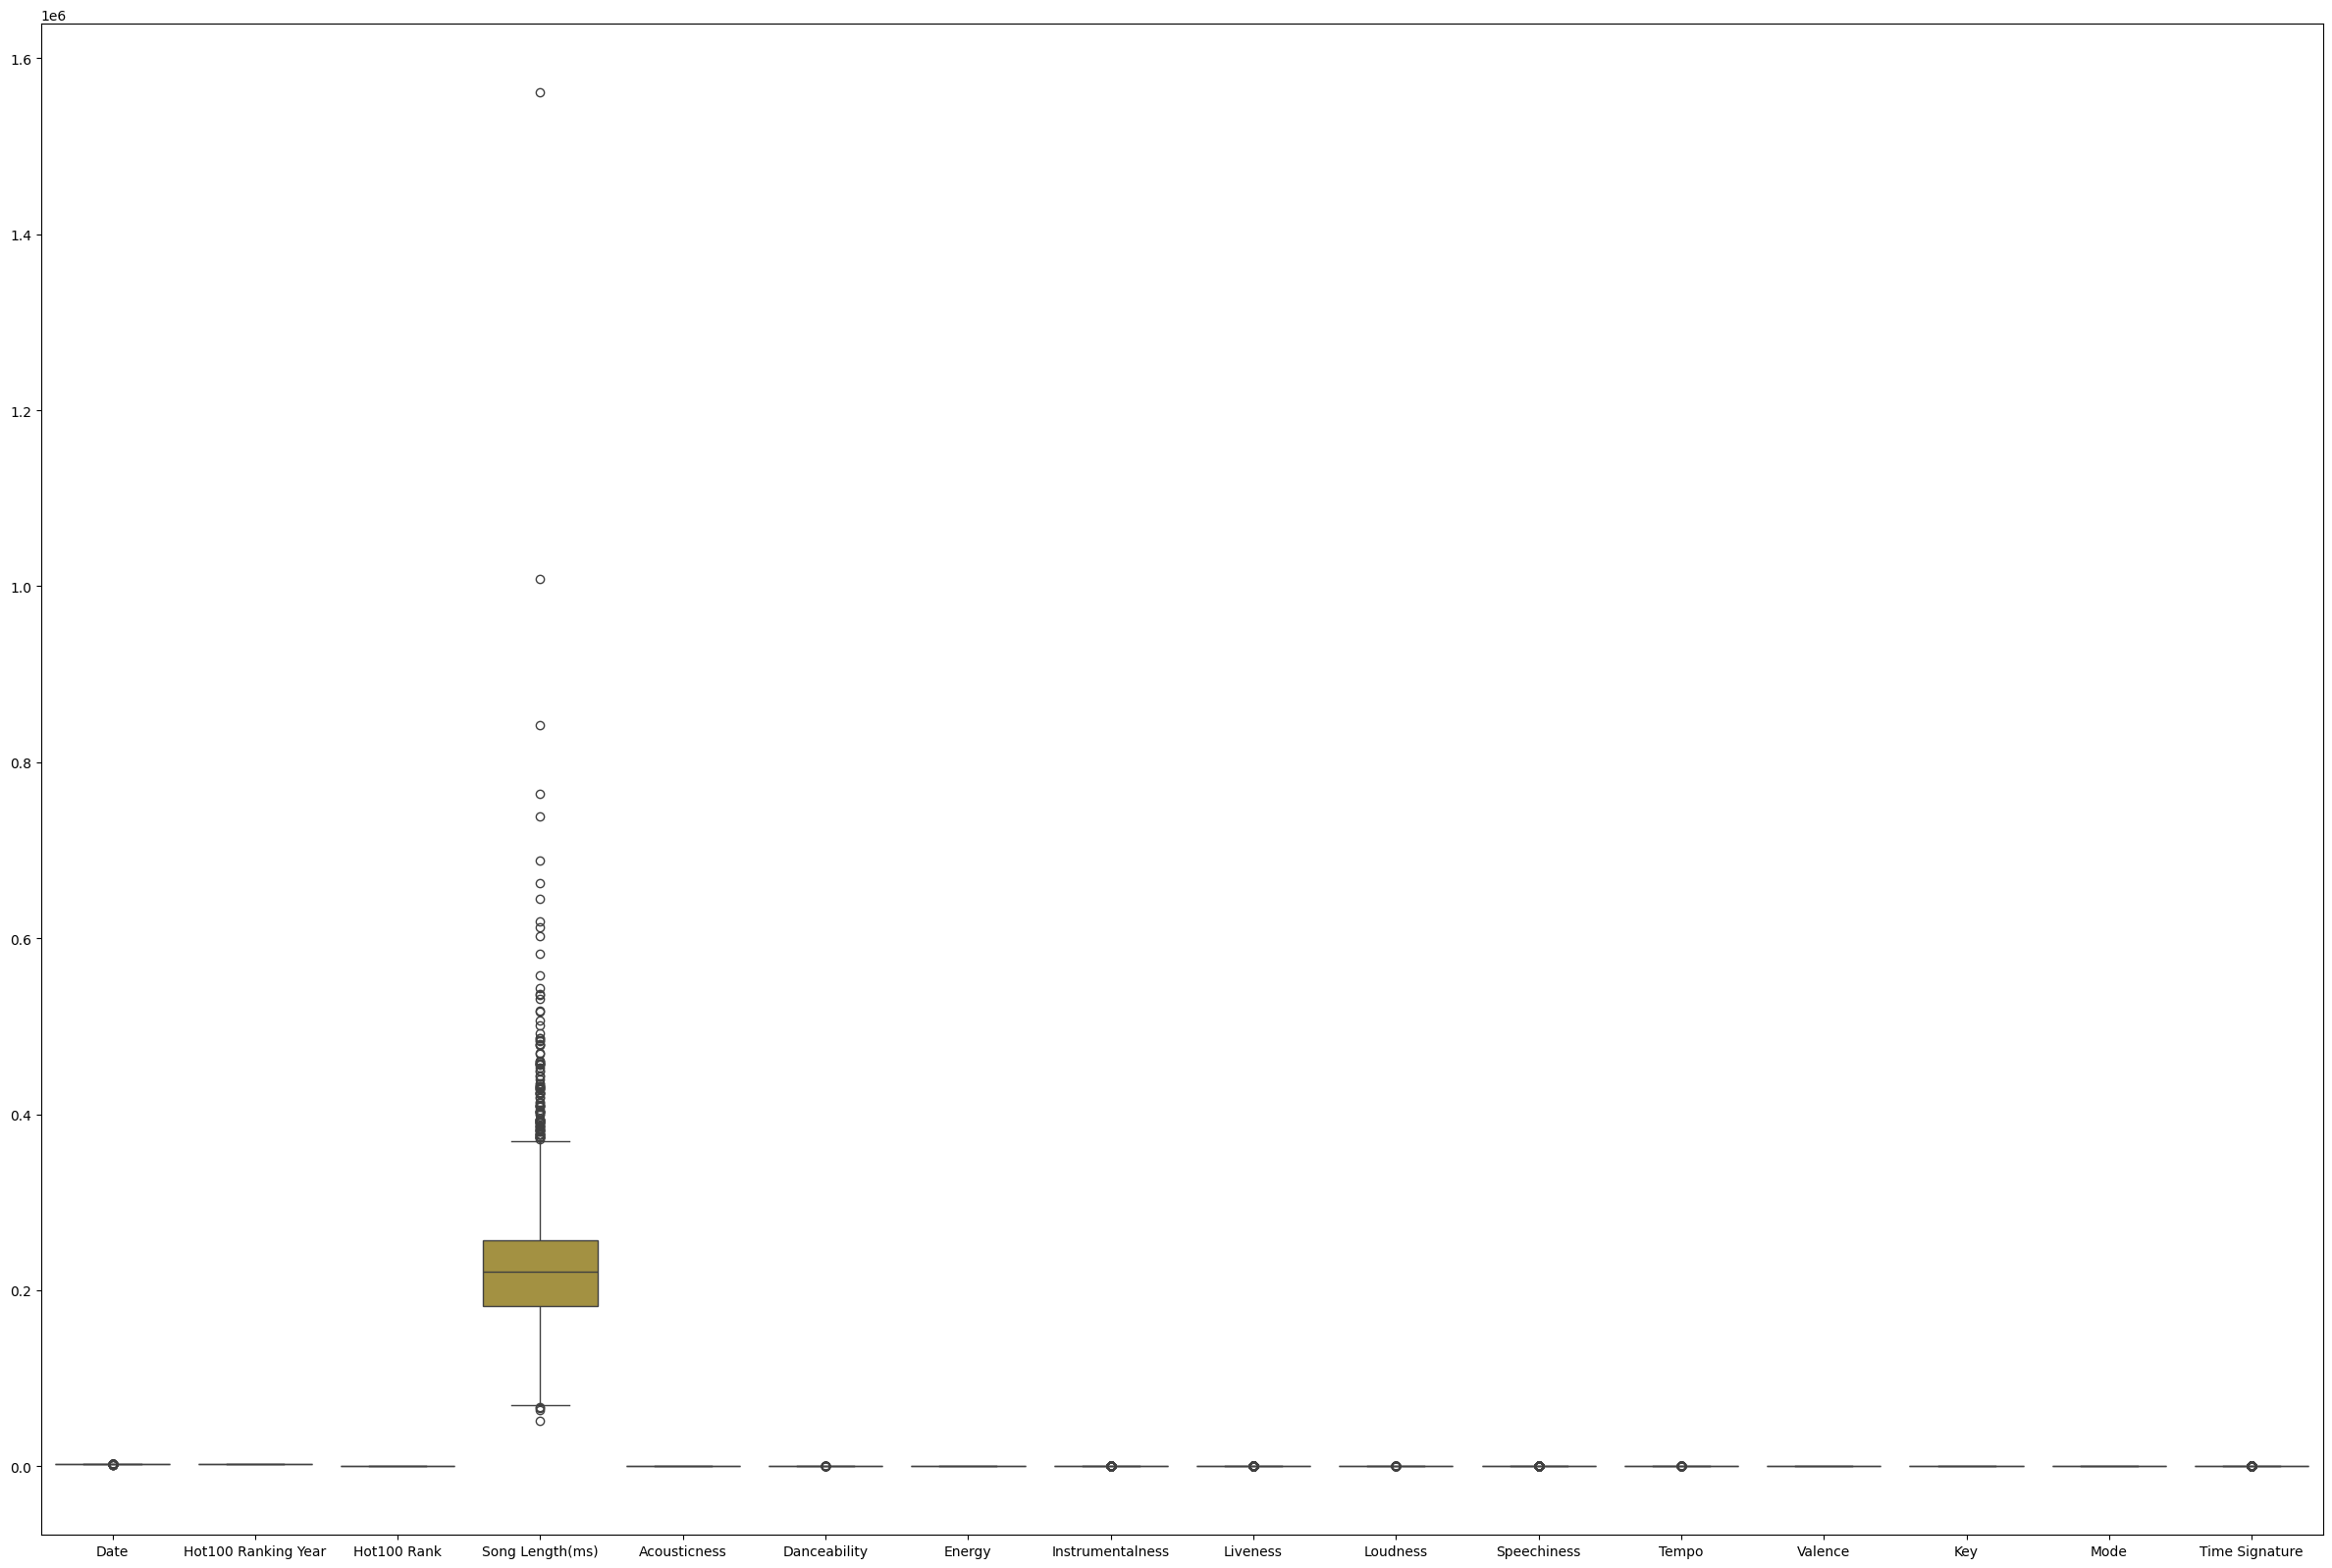

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (30,20))
sns.boxplot(data = df[outlier])

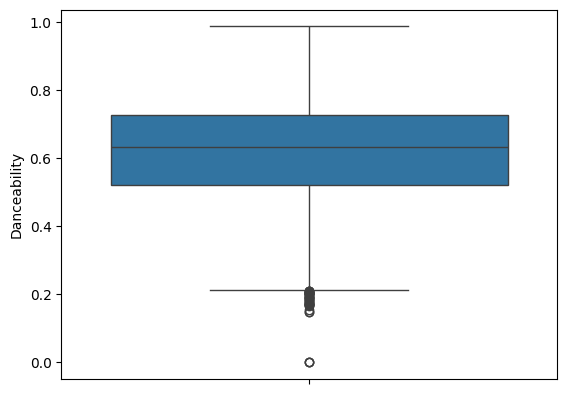

In [33]:
# OUTLIERS REMOVED - Danceability
sns.boxplot(df['Danceability'])
q1 = df['Danceability'].quantile(0.25)
q3 = df['Danceability'].quantile(0.75)
IQR = q3-q1
ll = q1-(1.5*IQR)
ul = q3+(1.5*IQR)
ll, ul
df = df[(df['Danceability']>=ll) & (df['Danceability']<=ul)]

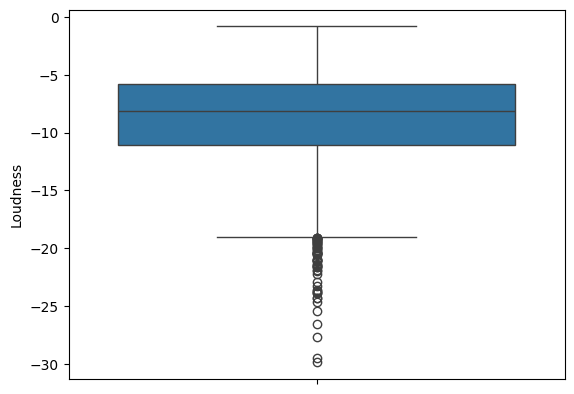

In [34]:
sns.boxplot(df['Loudness'])
q1 = df['Loudness'].quantile(0.25)
q3 = df['Loudness'].quantile(0.75)
IQR = q3-q1
ll = q1-(1.5*IQR)
ul = q3+(1.5*IQR)
ll, ul
df = df[(df['Loudness']>=ll) & (df['Loudness']<=ul)]

In [11]:
df.shape

(6090, 24)

**EDA**

In [35]:
bb = df.groupby(['Artist Names','PopularityLevel'])['PopularityLevel'].count()
bb = pd.DataFrame(bb)
bb.rename(columns = {'PopularityLevel': 'level'}, inplace = True)
bb = bb.reset_index()
bb

,Artist Names,PopularityLevel,level
0,"[""'Til Tuesday""]",Average,1
1,"[""1960's Karaoke Band""]",Not Popular,2
2,"[""1980's Karaoke Band""]",Not Popular,3
3,"[""1990's Karaoke Band""]",Not Popular,1
4,"[""2000's Karaoke Band""]",Not Popular,1
...,...,...,...
3681,"['gnash', ""Olivia O'Brien""]",Popular,1
3682,['iLoveMemphis'],Average,1
3683,['kiwi'],Average,1
3684,"['will.i.am', 'Britney Spears']",Popular,1


In [36]:
b = bb[bb['PopularityLevel'] == 'Popular'].nlargest(5, 'level')
b

,Artist Names,PopularityLevel,level
3017,['Taylor Swift'],Popular,25
2655,['Rihanna'],Popular,19
3071,['The Beatles'],Popular,18
996,['Drake'],Popular,14
233,['Ariana Grande'],Popular,12


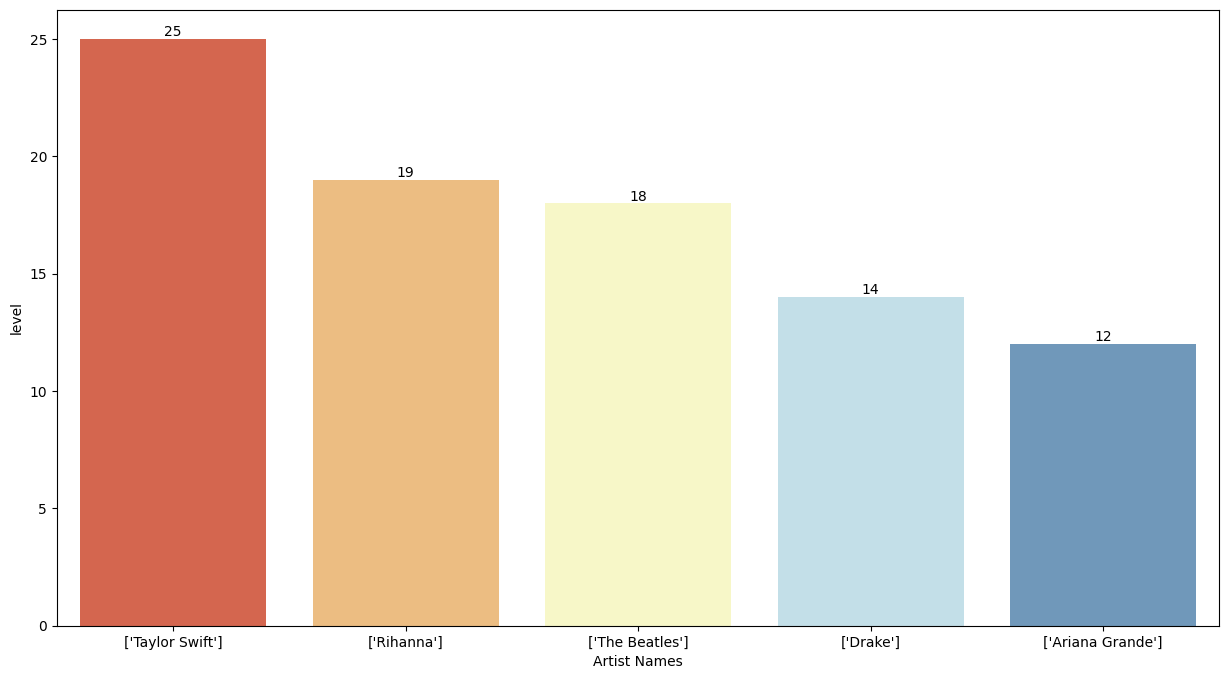

In [37]:
plt.figure(figsize =(15,8))
var1 = sns.barplot(x = b['Artist Names'], y = b['level'], palette = 'RdYlBu' )

for bars in var1.containers:
  var1.bar_label(bars)

([<matplotlib.patches.Wedge at 0x7fd1911217e0>,
 [Text(0.311736741311636, 1.0549029358743875, 'Average'),
  Text(-1.0959206452337378, -0.0946463911116951, 'Not Popular'),
  Text(0.40134680594086675, -1.0241683169094151, 'Popular')],
 [Text(0.1700382225336196, 0.5754016013860296, '40.9%'),
  Text(-0.5977748974002206, -0.051625304242742774, '21.0%'),
  Text(0.21891643960410911, -0.5586372637687719, '38.1%')])

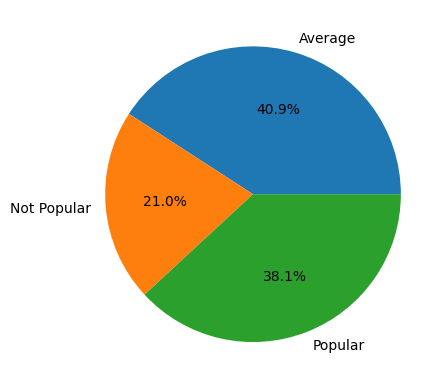

In [38]:
cc = pd.DataFrame(df.groupby('PopularityLevel')['PopularityLevel'].count())
cc = cc.rename(columns = {'PopularityLevel': 'Count'} ).reset_index()
plt.pie(cc['Count'], labels = cc['PopularityLevel'], autopct = '%1.1f%%')


**CORRELATIONS**

In [51]:
correl = df.select_dtypes(include=['int64', 'float64']).columns
correl = df[correl]
ccd = correl.corr()

In [14]:
correl.corr() < -0.8

,Date,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
Date,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Hot100 Ranking Year,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Hot100 Rank,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Song Length(ms),False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Acousticness,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Danceability,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Energy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Instrumentalness,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Liveness,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Loudness,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

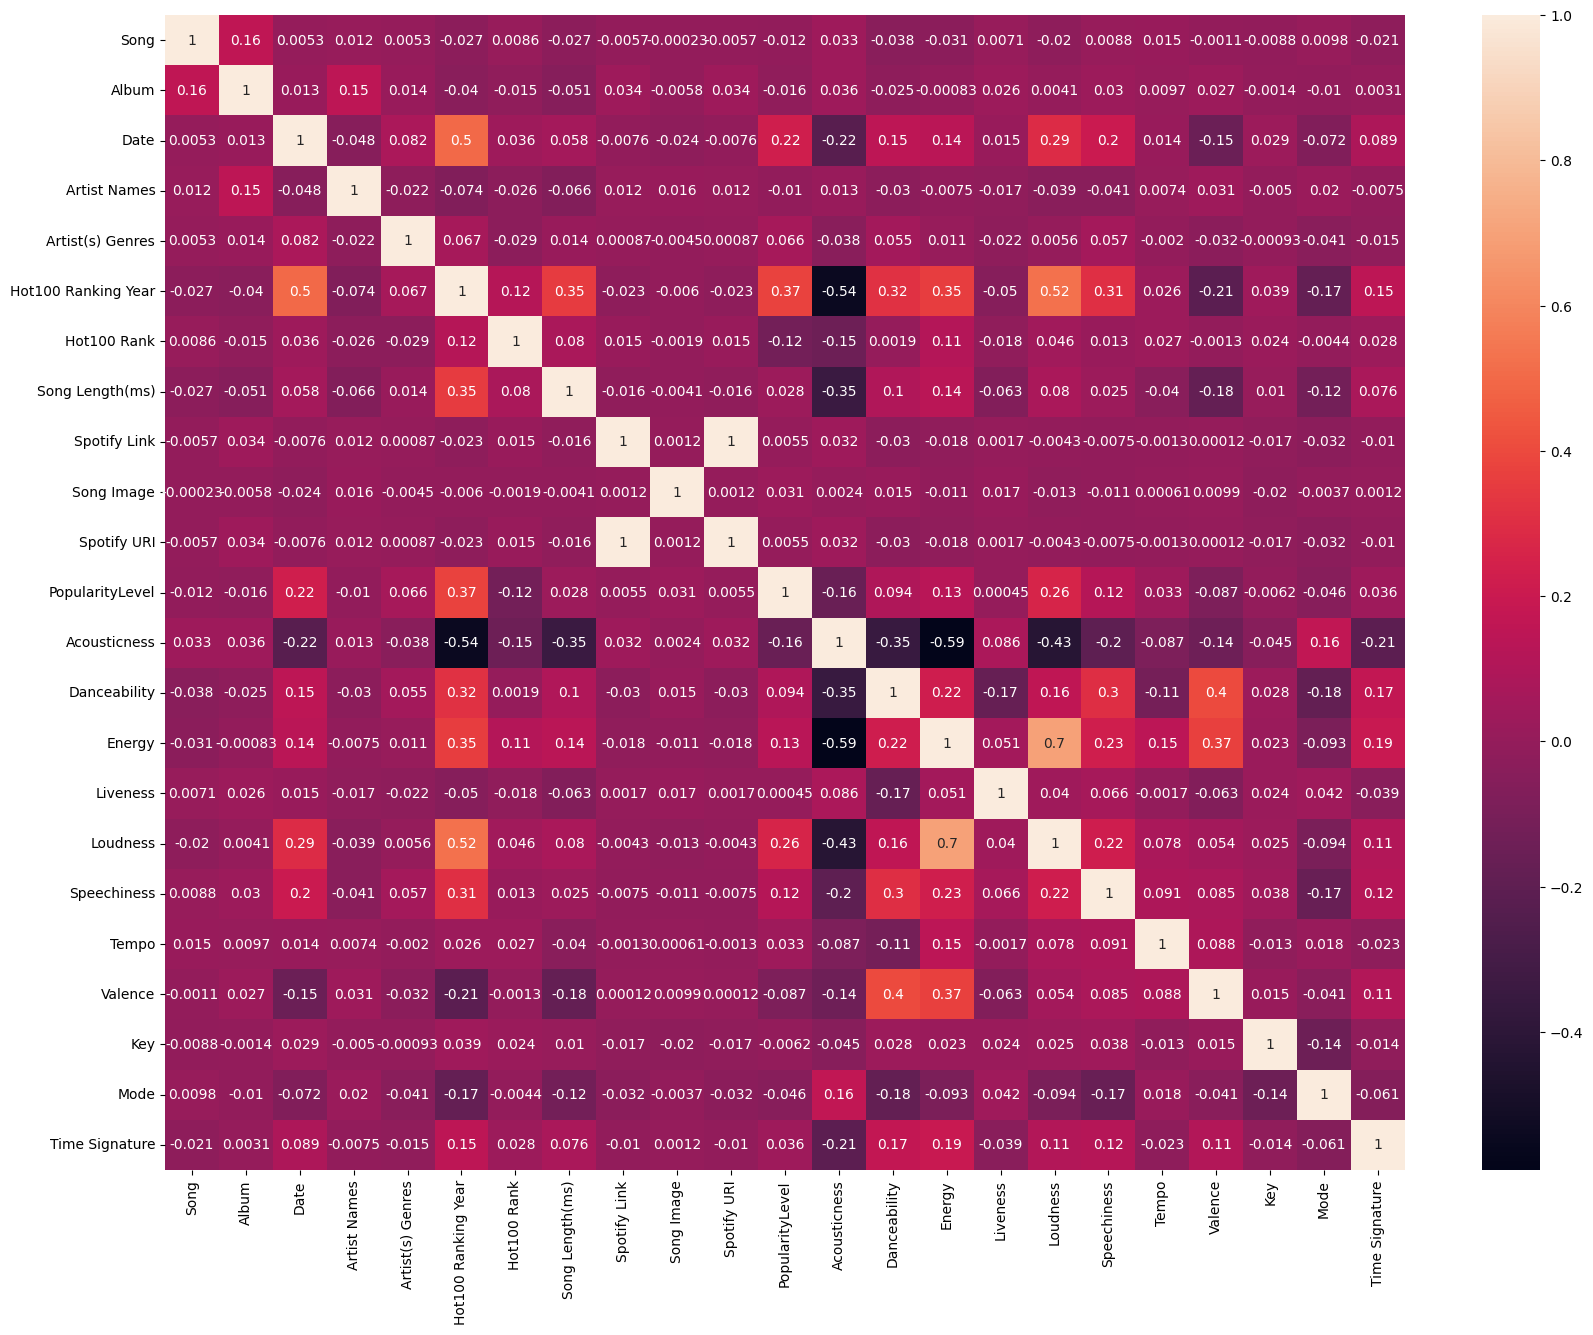

In [55]:
plt.figure(figsize = (20,15))
sns.heatmap(ccd, annot = True)

**SKEWNESS**

In [40]:
Skewn = df.select_dtypes(include=['int64', 'float64']).columns
Skewn = df[Skewn]
Skewn.skew()

,0
Date,-0.947459
Hot100 Ranking Year,-0.098117
Hot100 Rank,0.093552
Song Length(ms),1.648444
Acousticness,0.829106
Danceability,-0.346858
Energy,-0.351355
Instrumentalness,4.261970
Liveness,2.174439
Loudness,-0.524820


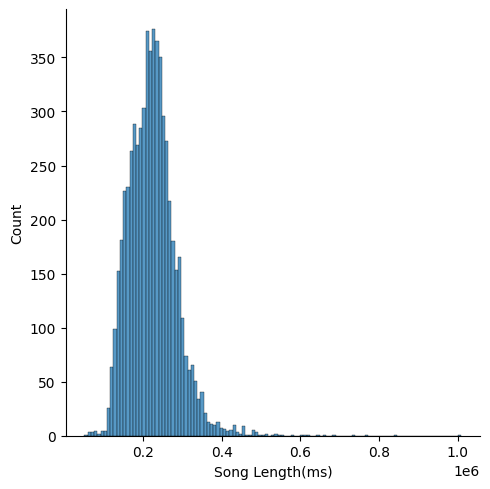

In [41]:
df['Song Length(ms)'].skew()
sns.displot(df['Song Length(ms)'])

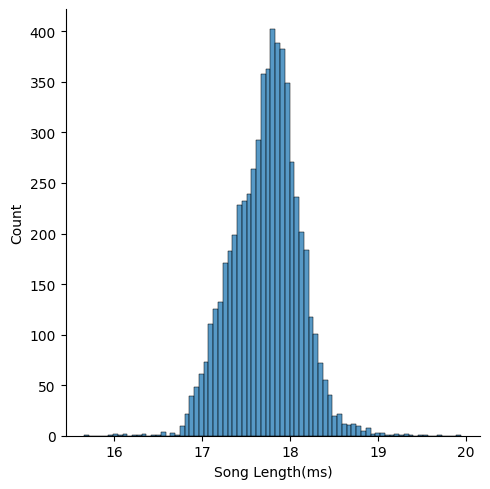

In [42]:
import numpy as np
np.log2(df['Song Length(ms)']).skew()
df['Song Length(ms)'] = np.log2(df['Song Length(ms)'])
sns.displot(df['Song Length(ms)'])

In [43]:
df.drop(columns = ['Instrumentalness'], inplace = True)

In [44]:
np.log2(df['Liveness']).skew()
df['Liveness'] = np.log2(df['Liveness'])

In [45]:
np.log(df['Speechiness']).skew()
df['Speechiness'] = np.log(df['Speechiness'])

In [46]:
np.power(df['Time Signature'], 3.5).skew()
df['Time Signature'] = np.power(df['Time Signature'],3.5)

***LABEL ENCODING ***

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6090 entries, 0 to 6190
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6090 non-null   object 
 1   Album                6090 non-null   object 
 2   Date                 6090 non-null   int64  
 3   Artist Names         6090 non-null   object 
 4   Artist(s) Genres     6090 non-null   object 
 5   Hot100 Ranking Year  6090 non-null   int64  
 6   Hot100 Rank          6090 non-null   int64  
 7   Song Length(ms)      6090 non-null   float64
 8   Spotify Link         6090 non-null   object 
 9   Song Image           6090 non-null   object 
 10  Spotify URI          6090 non-null   object 
 11  PopularityLevel      6090 non-null   object 
 12  Acousticness         6090 non-null   float64
 13  Danceability         6090 non-null   float64
 14  Energy               6090 non-null   float64
 15  Liveness             6090 non-null   float6

In [48]:
from sklearn.preprocessing import LabelEncoder
lbe = df.select_dtypes(include=['object']).columns
lbe

Index(['Song', 'Album', 'Artist Names', 'Artist(s) Genres', 'Spotify Link',
       'Song Image', 'Spotify URI', 'PopularityLevel'],
      dtype='object')

In [49]:
for i in lbe:
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

In [57]:
df.columns

Index(['Song', 'Album', 'Date', 'Artist Names', 'Artist(s) Genres',
       'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)', 'Spotify Link',
       'Song Image', 'Spotify URI', 'PopularityLevel', 'Acousticness',
       'Danceability', 'Energy', 'Liveness', 'Loudness', 'Speechiness',
       'Tempo', 'Valence', 'Key', 'Mode', 'Time Signature'],
      dtype='object')

***STANDARDIZATION ***

In [60]:
X = ['Artist(s) Genres', 'Acousticness', 'Danceability', 'Energy', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence', 'Key']
X = df[X]
Y = df['PopularityLevel']

In [64]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)
x = pd.DataFrame(X_ss)
y = Y

**TRAIN - TEST - SPLIT**

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
x_train.shape,y_train.shape , x_test.shape, y_test.shape

((4872, 10), (4872,), (1218, 10), (1218,))

In [70]:
# BALANCING - SMOTE
y_train.value_counts()

,count
PopularityLevel,
0,1991
2,1844
1,1037


In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_b, y_train_b = sm.fit_resample(x_train,y_train)
y_train_b.value_counts()

,count
PopularityLevel,
2,1991
0,1991
1,1991


**MODEL TRAINING**

In [78]:
# decesion Tree  [[MODEL - 1]]  --> train: 100% , test: 51%
# ---------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
dtc1.fit(x_train_b, y_train_b)

# Prediction
y_train_pred = dtc1.predict(x_train)
y_test_pred = dtc1.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_test1 = accuracy_score(y_test,y_test_pred)
accuracy_train1 = accuracy_score(y_train,y_train_pred)
accuracy_test1 , accuracy_train1

(0.5082101806239737, 1.0)

In [113]:
# decesion Tree + bagging [[MODEL - 2]]  --> train: 100% , test: 62%
# ---------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
dtbc2 = BaggingClassifier(base_estimator = dt, n_estimators = 75, random_state = 42)
dtbc2.fit(x_train_b, y_train_b)

# Prediction
y_train_pred2 = dtc1.predict(x_train_b)
Y_test_pred2 = dtbc2.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_test2 = accuracy_score(y_test,Y_test_pred2)
accuracy_train2 = accuracy_score(y_train_b,y_train_pred2)
accuracy_test2 , accuracy_train2

(0.6182266009852216, 1.0)

In [121]:
# Random Forest Classifier [[MODEL - 3]]  --> train: 100% , test: 60%
#---------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
rfc3 = RandomForestClassifier()
rfc3.fit(x_train_b, y_train_b)

# Prediction
Y_train_pred3 = rfc3.predict(x_train_b)
Y_test_pred3 = rfc3.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_test3 = accuracy_score(y_test,Y_test_pred3)
accuracy_train3 = accuracy_score(y_train_b,Y_train_pred3)
accuracy_test3 , accuracy_train3

(0.5977011494252874, 1.0)

In [123]:
# Random Forest Classifier + Bagging [[MODEL - 4]]  --> train: 98% , test: 60%
#---------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
rf = RandomForestClassifier()
rfbc4 = BaggingClassifier(base_estimator = rf, n_estimators = 10, random_state= 42)
rfbc4.fit(x_train_b, y_train_b)
# Prediction
Y_train_pred4 = rfbc4.predict(x_train_b)
Y_test_pred4 = rfbc4.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_test4 = accuracy_score(y_test,Y_test_pred4)
accuracy_train4 = accuracy_score(y_train_b,Y_train_pred4)
accuracy_test4 , accuracy_train4

(0.5952380952380952, 0.9812489536246443)

In [139]:
ne = []
acc = []
for c in range(15,70):
  rfbc4 = BaggingClassifier(base_estimator = rf, n_estimators = c, random_state= 42)
  rfbc4.fit(x_train_b, y_train_b)
  Y_test_predd = rfbc4.predict(x_test)
  accuracy_testt = accuracy_score(y_test,Y_test_predd)
  ne.append(c)
  acc.append(accuracy_testt)

In [134]:
acc

[0.5722495894909688]

In [140]:
Ne = pd.DataFrame(ne)
Acc = pd.DataFrame(acc)
pd.concat([Ne,Acc], axis = 1)

,0,0
0,15,0.595238
1,16,0.598522
2,17,0.595238
3,18,0.596059
4,19,0.595238
5,20,0.599343
6,21,0.595238
7,22,0.599343
8,23,0.598522
9,24,0.596880


In [142]:
Acc.max()

,0
0,0.602627


**REMOVING FEATURE COLUMNS** (as the model is still under overfitting )

In [145]:
Xn = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Loudness', 'Tempo', 'Valence']
Xn = df[Xn]
Yn = df['PopularityLevel']

In [146]:
from sklearn.preprocessing import StandardScaler
ss_n = StandardScaler()
X_ss_n = ss.fit_transform(Xn)
xn = pd.DataFrame(X_ss_n)
yn = Yn

from sklearn.model_selection import train_test_split
x_trainn,x_testn, y_trainn, y_testn = train_test_split(xn,yn,test_size = 0.2, random_state = 42)

from imblearn.over_sampling import SMOTE
smn = SMOTE(random_state = 42)
x_train_bn, y_train_bn = sm.fit_resample(x_trainn,y_trainn)

In [148]:
from sklearn.tree import DecisionTreeClassifier
dtcn1 = DecisionTreeClassifier()
dtcn1.fit(x_train_bn, y_train_bn)

# Prediction
y_train_predn = dtcn1.predict(x_train_bn)
y_test_predn = dtcn1.predict(x_testn)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_testn1 = accuracy_score(y_testn,y_test_predn)
accuracy_trainn1 = accuracy_score(y_train_bn,y_train_predn)
accuracy_testn1 , accuracy_trainn1

(0.47126436781609193, 1.0)